In [282]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

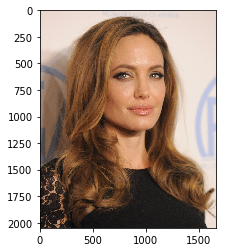

In [283]:
face1 = cv2.imread('./homework-facedata/1.jpg')
plt.imshow(face1[:,:,::-1])

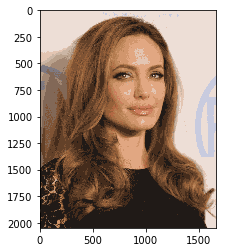

In [284]:
Z = face1.reshape((-1,3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 20
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((face1.shape))

plt.imshow(res2[:,:,::-1])

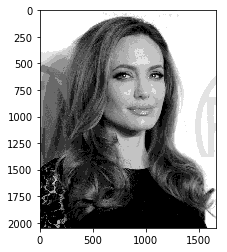

In [285]:
res3 = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
plt.imshow(res3, cmap='gray')

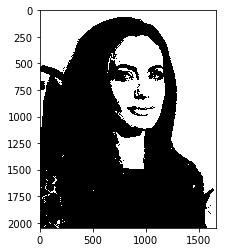

In [286]:
ret, res4 = cv2.threshold(res3,140,255,cv2.THRESH_BINARY)
plt.imshow(res4, cmap='gray')

In [ ]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(res4,connectivity=8)
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

True

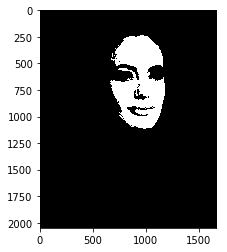

In [288]:
mask = np.zeros_like(res4, dtype=np.uint8)
mask[labels==18] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite('1_out.jpg', mask)

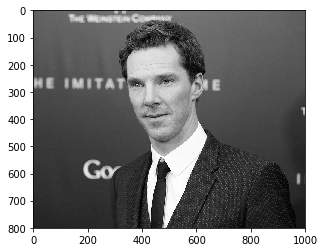

In [289]:
img = cv2.imread('homework-facedata/2.jpg', 0)
plt.imshow(img, cmap='gray')

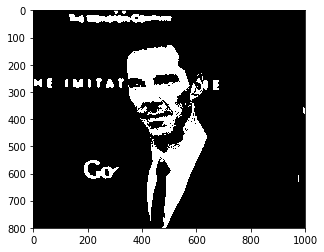

In [290]:
ret, res4 = cv2.threshold(img,159,255,cv2.THRESH_BINARY)
plt.imshow(res4, cmap='gray')

In [ ]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(res4,connectivity=8)
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

True

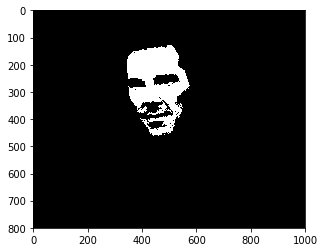

In [293]:
mask = np.zeros_like(res4, dtype=np.uint8)
mask[labels==18] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite('2_out.jpg', mask)

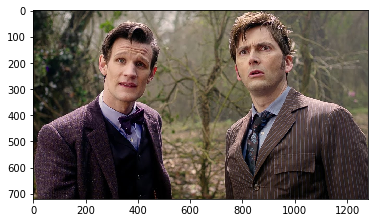

In [76]:
img = cv2.imread('homework-facedata/3.jpg')
plt.imshow(img[:,:,::-1])

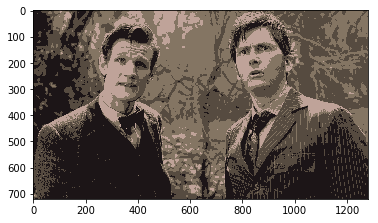

In [84]:
Z = img.reshape((-1,3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2[:,:,::-1])

In [298]:
img = cv2.imread('./homework-facedata/3.jpg')

In [299]:
# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         if img[i][j][0] > 44 and img[i][j][0] < 220 and img[i][j][1] > 50 and img[i][j][1] < 200 and img[i][j][2] > 107 and img[i][j][2] < 200:
#             res4[i][j] = 255
#         else:
#             res4[i][j] = 0
# res4
lower = np.array([25, 60, 130])
upper = np.array([160, 175, 255])
mask = cv2.inRange(img, lower, upper)

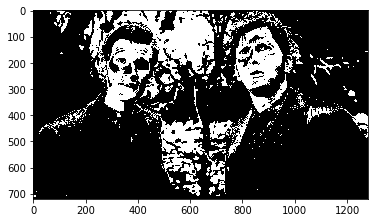

In [300]:
plt.imshow(mask, cmap='gray')

In [301]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask1 = cv2.erode(mask, kernel, iterations=1)


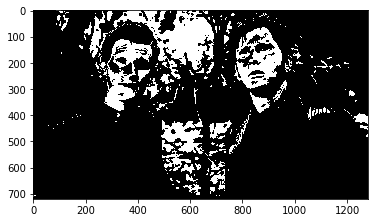

In [302]:
plt.imshow(mask1, cmap='gray')

In [ ]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(mask1,connectivity=8)
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

True

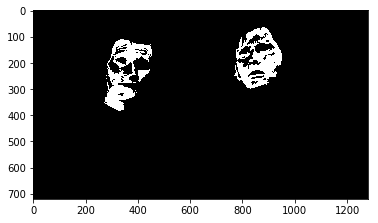

In [308]:
mask2 = np.zeros_like(mask1, dtype=np.uint8)
mask2[labels==100] = 255
mask2[labels==130] = 255
mask2[labels==206] = 255
plt.imshow(mask2, cmap='gray')
cv2.imwrite('03_out.jpg', mask2)